In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud ,STOPWORDS
from collections import Counter

In [2]:
train = pd.read_csv("comments_toxicity.csv") 
train.head()

,text,language,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,ахахахахаха😂 хохлы 🤡,ru,0.005068,0.000129,0.002561,0.000555,0.003691,0.000172,0.000272
1,путин может встретиться с илоном. СЛАВА РОССИИ...,ru,0.905723,0.003051,0.013048,0.051917,0.075524,0.659054,0.006369
2,Разница в том что это твой отчим а не Зеленски...,ru,0.016160,0.000099,0.003766,0.000343,0.010100,0.000113,0.000332
3,Эмм путин топ,ru,0.004856,0.000074,0.002391,0.000196,0.002722,0.000167,0.000201
4,Нее Путин так не может.!,ru,0.034982,0.000029,0.000845,0.000362,0.023030,0.000112,0.000139


In [3]:
df_en = train[train['language'] == 'en']
print(df_en.shape)
df_en.head()

(25031, 9)


,text,language,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
52,Where is the Heroine on his desk?,en,0.000964,0.000020,0.000137,0.000120,0.000368,0.000050,0.000023
53,his voice is full cocaine,en,0.694876,0.000068,0.001075,0.000798,0.583297,0.000438,0.000197
60,Death Russia,en,0.809949,0.002489,0.004254,0.021970,0.010619,0.664593,0.001878
80,Ukraine Are Neo-Nazis Rascist Slaves to Americ...,en,0.323540,0.000110,0.001474,0.062889,0.127727,0.000694,0.000202
81,There’s a lot of money to be made in wars. Ask...,en,0.000835,0.000025,0.000191,0.000102,0.000270,0.000072,0.000035


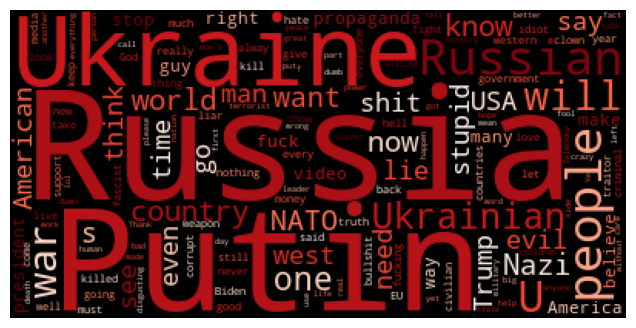

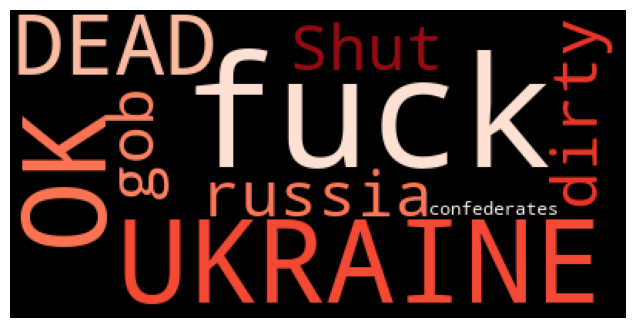

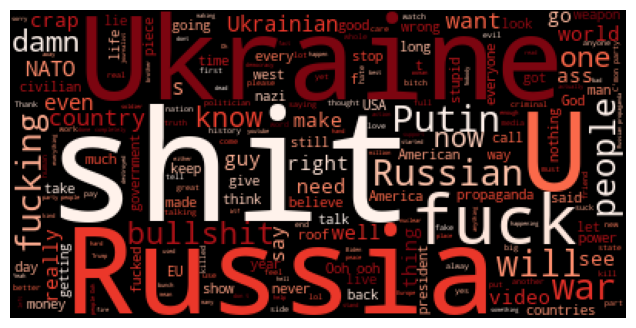

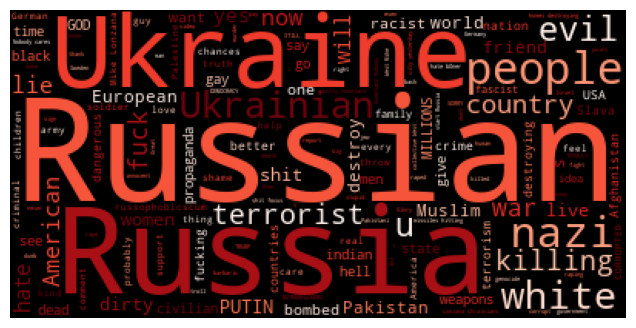

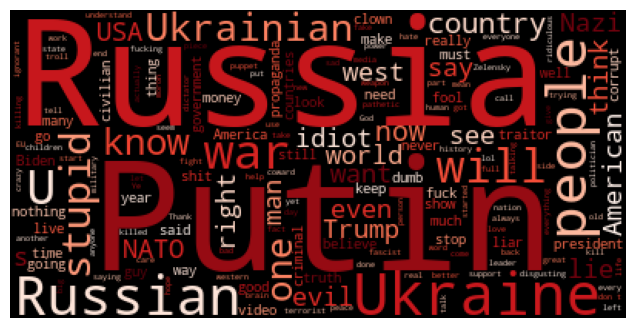

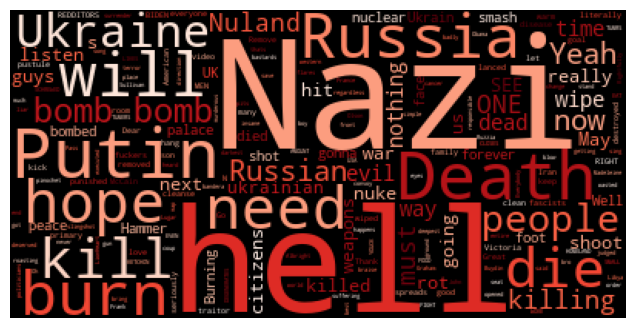

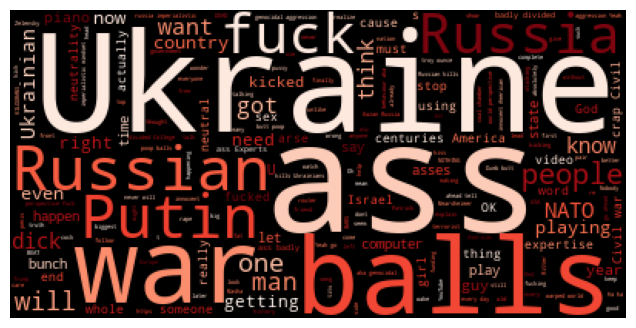

In [7]:
stopwords = set(STOPWORDS)
df_en_ = df_en.copy(deep=True)

for l in df_en_.columns[2:]:
    df_en_[l] = round(df_en_[l])
    subset = df_en_[df_en_[l]==1]
    text = " ".join(i for i in subset.text)
    wordcloud = WordCloud(
        stopwords=stopwords,
        max_words=200,
        max_font_size=100, 
        colormap="Reds"
        ).generate(text)

    fig = plt.figure(figsize=(8, 4))
#     plt.title(l)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [10]:
# marking comments without any tags as "clean"
tag_sums = df_en_.iloc[:,2:].sum(axis=1)
df_en_['clean'] = (tag_sums==0)

In [11]:
label_count = df_en_[df_en_.columns[2:]].sum()
label_count

toxicity            4020.0
severe_toxicity        3.0
obscene              841.0
identity_attack      221.0
insult              2355.0
threat               104.0
sexual_explicit      159.0
clean              21010.0
dtype: float64

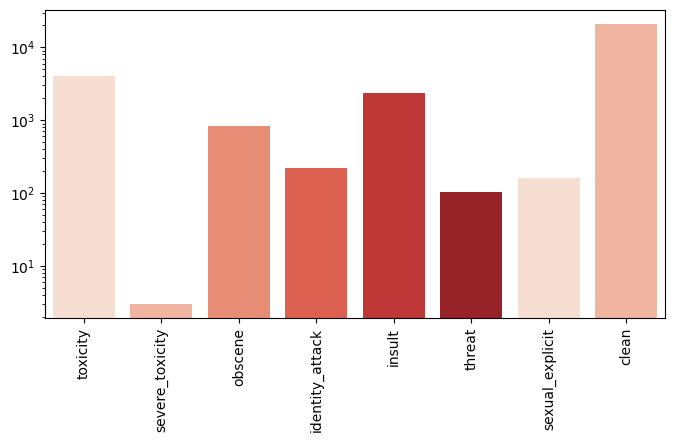

In [16]:
plt.figure(figsize=(8,4))
sns.barplot(x= label_count.index, y = label_count.values, palette= sns.color_palette("Reds"))
plt.yscale('log')
plt.xticks(rotation=90)
# plt.title('Toxicity Class Frequency', fontsize=12)
plt.show()
